# credit card fraud detection - 신용카드 부정 사용자 검출

## 데이터 읽기

In [1]:
import pandas as pd

data_path = 'datas/creditcard.csv'

raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 클래스 불균형 확인

In [4]:
raw_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
frauds_rate = round(raw_data['Class'].value_counts()[1] / len(raw_data) * 100, 2)

print('Frauds', frauds_rate, '% of the dataset')

Frauds 0.17 % of the dataset


## 데이터 분할

In [6]:
x = raw_data.iloc[:, 1:-1]  # V1 ~ Amount
y = raw_data.iloc[:, -1]    # Class

x.shape, y.shape

((284807, 29), (284807,))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=13, 
                                                    stratify=y)

## 분할된 데이터의 불균형 정도를 파악

In [8]:
import numpy as np

np.unique(y_train, return_counts = True)

(array([0, 1]), array([199020,    344]))

In [9]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp[1] / len(y_train) * 100

0.17254870488152324

## 1st trial - 모델 그냥 사용해보기

- 데이터 클래스 불균형이 있긴 하지만, 일단은 여러 모델들을 그대로 학습에 사용하여 예측 결과를 확인해보자.

### 분류기의 성능을 return하는 함수 선언

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


def get_clf_eval(y_test, pred) :
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

### confusion matrix를 출력하는 함수 선언

In [11]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('==============')

    print('Accuracy : {0:.4f}, Precision : {1:.4f}'.format(acc, pre))
    print('Recall : {0:.4f}, F1 : {1:.4f}, AUC : {2:.4f}'.format(re, f1, auc))

### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)

print_clf_eval(y_test, lr_pred)

=> confusion matrix
[[85284    11]
 [   60    88]]
Accuracy : 0.9992, Precision : 0.8889
Recall : 0.5946, F1 : 0.7126, AUC : 0.7972


### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[85281    14]
 [   42   106]]
Accuracy : 0.9993, Precision : 0.8833
Recall : 0.7162, F1 : 0.7910, AUC : 0.8580


### RandomForest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13,
                                n_jobs=-1,
                                n_estimators=100)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[85288     7]
 [   38   110]]
Accuracy : 0.9995, Precision : 0.9402
Recall : 0.7432, F1 : 0.8302, AUC : 0.8716


### LightGBM

In [15]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13,
                          n_jobs=-1,
                          n_estimators=1000,
                          num_leaves=64,
                          boost_from_average=False)

lgbm_clf.fit(x_train, y_train)
lgbm_pred = lgbm_clf.predict(x_test)

print_clf_eval(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

### 모델과 데이터를 전달하면 성능을 출력하는 함수 선언

In [ ]:
def get_result(model, x_train, y_train, x_test, y_test) :
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    return get_clf_eval(y_test, pred)

### 다수의 모델 성능을 DataFrame으로 정리해주는 함수 선언

In [17]:
def get_result_pd(models, model_names, x_train, y_train, x_test, y_test) :
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models :
        tmp.append(get_result(model, x_train, y_train, x_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [18]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, x_train, y_train, x_test, y_test)

print('Fit time : ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999473,0.940171,0.743243,0.830189,0.871581
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


## 2nd Trial - amount feature를 관찰해보자

- 지금까지 데이터의 feature들에 대한 전처리 작업 없이 그대로 훈련과 테스트 input에 넣어 여러 모델들의 성능을 비교하였다.
- 이번에는 feature, 특히 amount에 대한 전처리 작업을 통해 모델의 성능을 다시 확인해보자.

### raw_data의 Amount 컬럼 확인

/var/folders/l3/cq8y8n3s03v315zt58m2zrv80000gn/T/ipykernel_18658/3629449394.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Amount'], color='r')


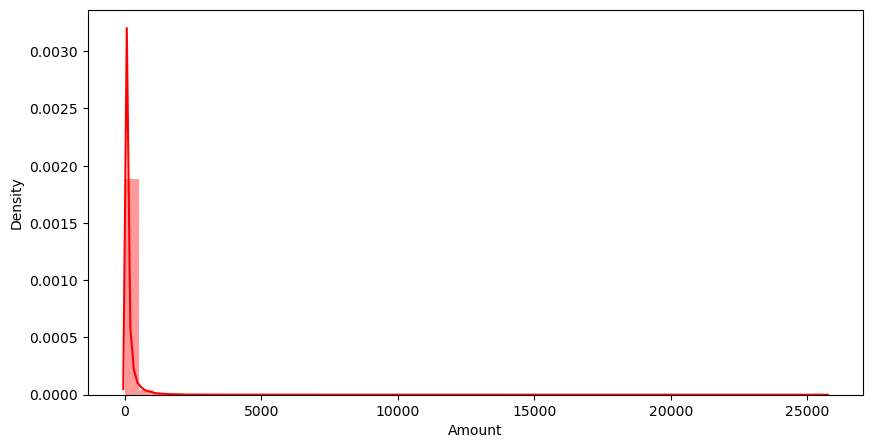

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.distplot(raw_data['Amount'], color='r')

plt.show()

### Amount 컬럼에 StandartScaler 적용

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1, 1))

raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


### 데이터 분할

In [21]:
x_train, x_test, y_train, y_test = train_test_split(raw_data_copy, y,
                                                    test_size = 0.3,
                                                    random_state=13,
                                                    stratify=y)

### 모델 평가

In [22]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, x_train, y_train, x_test, y_test)

print('Fit time : ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999473,0.940171,0.743243,0.830189,0.871581
LightGBM,0.999520,0.949580,0.763514,0.846442,0.881722


### 모델별 ROC 커브

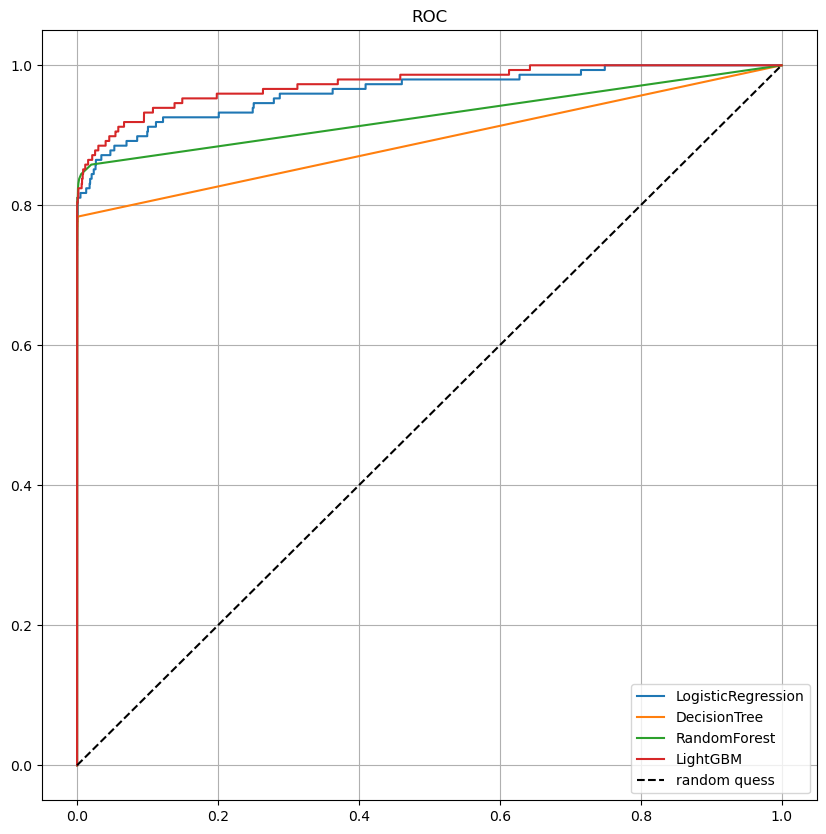

In [23]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, x_test, y_test) :
    plt.figure(figsize=(10, 10))

    for model in range(len(models)) :
        pred = models[model].predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, x_test, y_test)

### Amount 컬럼에 log scale 적용

In [24]:
amount_log = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_log
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


/var/folders/l3/cq8y8n3s03v315zt58m2zrv80000gn/T/ipykernel_18658/4190988737.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data_copy['Amount_Scaled'], color='r')


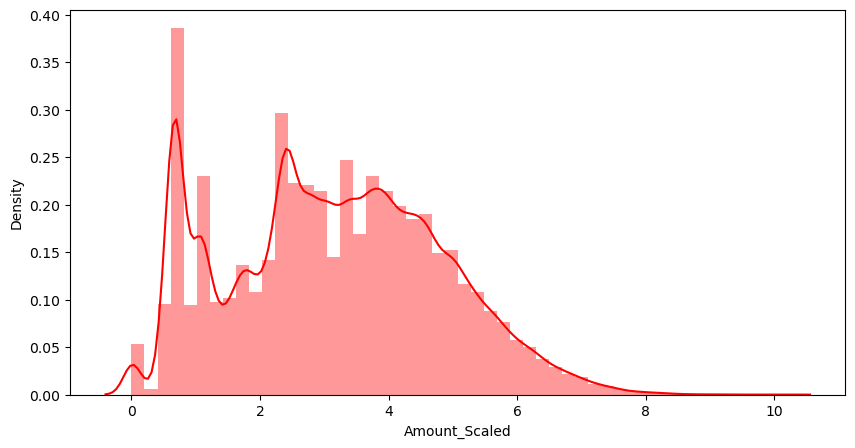

In [25]:
plt.figure(figsize=(10, 5))
sns.distplot(raw_data_copy['Amount_Scaled'], color='r')

plt.show()

### 데이터 분할

In [26]:
x_train, x_test, y_train, y_test = train_test_split(raw_data_copy, y,
                                                    test_size = 0.3,
                                                    random_state=13,
                                                    stratify=y)

### 모델 평가

In [27]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, x_train, y_train, x_test, y_test)

print('Fit time : ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999473,0.940171,0.743243,0.830189,0.871581
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


### 모델별 ROC 커브

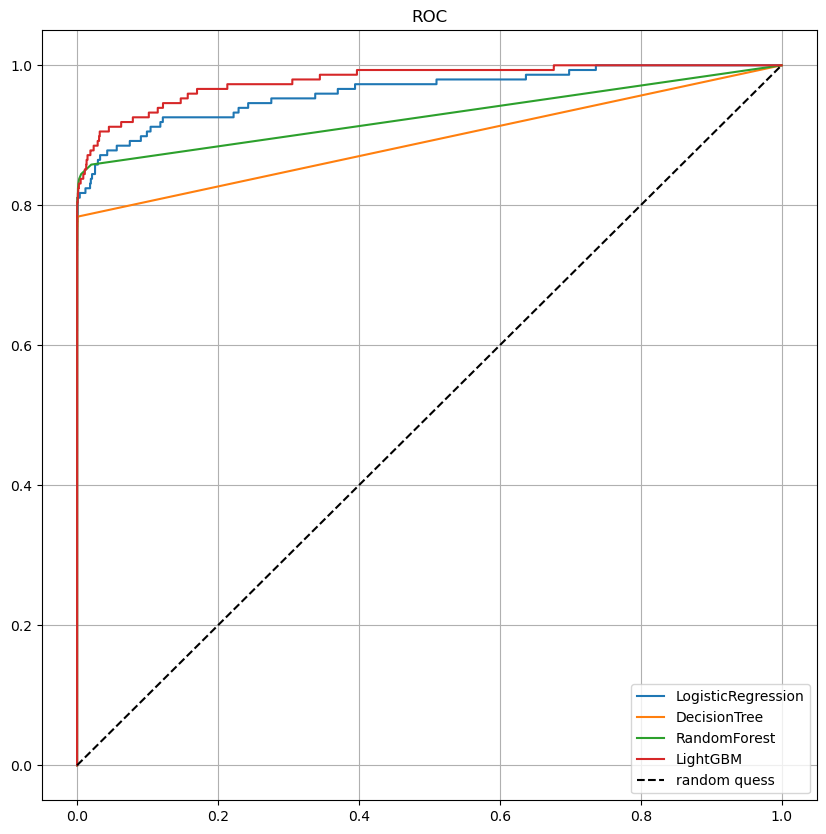

In [28]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, x_test, y_test) :
    plt.figure(figsize=(10, 10))

    for model in range(len(models)) :
        pred = models[model].predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, x_test, y_test)

## 3rd Trial - 데이터의 outlier를 정리하기

- 데이터 전처리 작업 없이 모델을 훈련한 결과와 전처리 후 훈련 결과, 모델들의 성능 차이가 많이 나지 않았다.
- 이번에는 데이터에서 outlier를 띄는 값들을 정리한 후 다시 모델들을 평가해보자.

### 특정 컬럼 관찰

<Axes: >

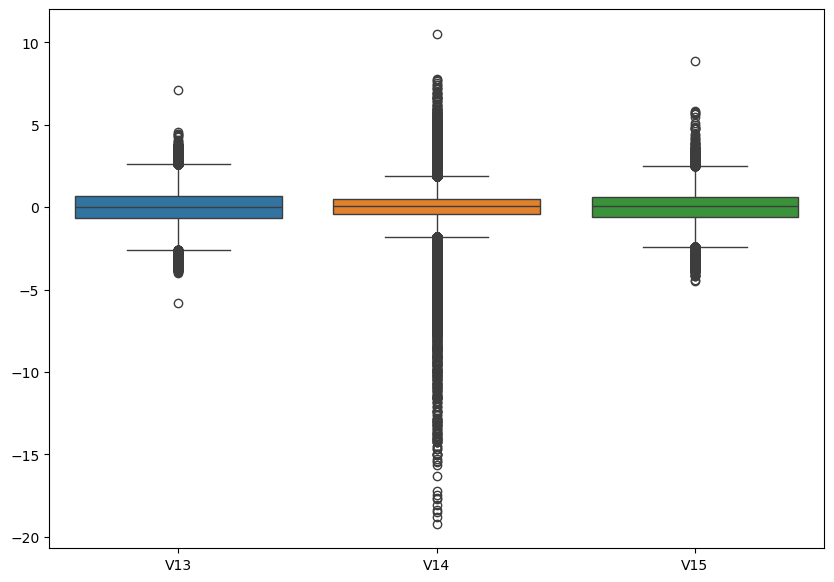

In [29]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=raw_data[['V13', 'V14', 'V15']])

### outlier 인덱스 파악

In [30]:
def get_outlier(df=None, column=None, weight=1.5) :
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)   # Q1
    quantile_75 = np.percentile(fraud.values, 75)   # Q3

    iqr = quantile_75 - quantile_25     # Q2
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [31]:
get_outlier(df=raw_data, column='V14')

Index([8296, 8615, 9035, 9252], dtype='int64')

### outlier 제거

In [32]:
raw_data_copy.shape

(284807, 29)

In [33]:
outlier_index = get_outlier(df=raw_data, column='V14', weight=1.5)
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 29)

### outlier를 제거하고 데이터 분할

In [34]:
x = raw_data_copy

raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=13,
                                                    stratify=y)

### 모델 평가

In [35]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, x_train, y_train, x_test, y_test)

print('Fit time : ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.870229,0.780822,0.823105,0.890311
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928
LightGBM,0.999602,0.951613,0.808219,0.874074,0.904074


### 모델별 ROC 커브

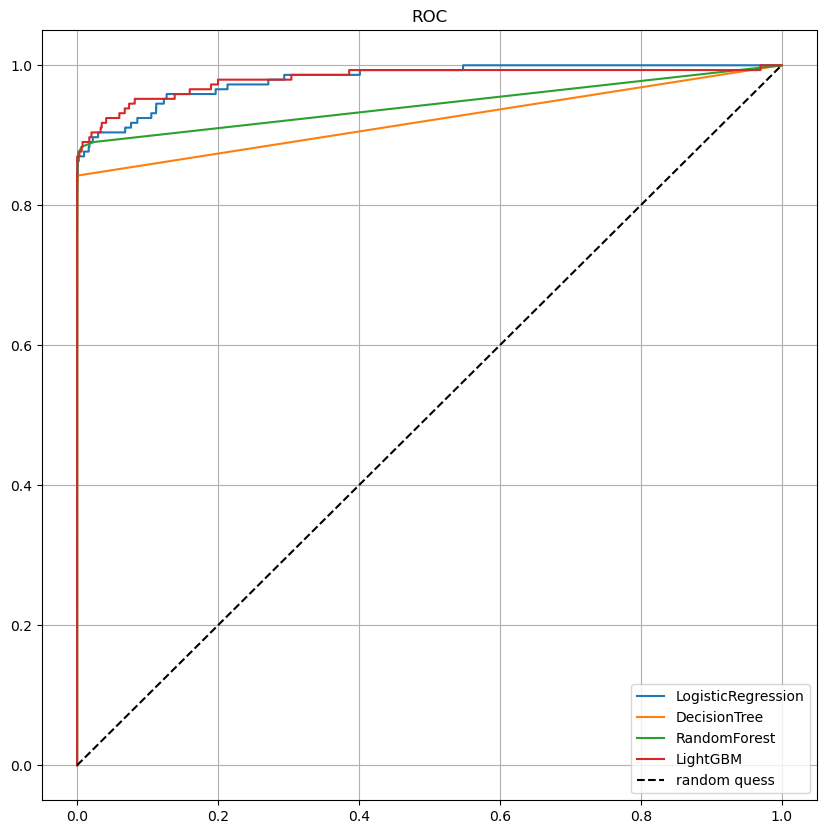

In [36]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, x_test, y_test) :
    plt.figure(figsize=(10, 10))

    for model in range(len(models)) :
        pred = models[model].predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, x_test, y_test)

## 4th Trial - SMOTE Oversampling

- 지금까지 데이터 스케일링, 아웃라이어 제거를 통해 모델의 성능을 조금씩 향상시켜왔다.
- 이번에는 맨 처음 데이터를 파악했을 때부터 확인했던 데이터 불균형을 해결해보자.
- oversampling이라는 기술을 이용하여 부족했던 fraud(Class=1) 데이터 비율을 정상(Class=0) 데이터 비율과 맞춰보자.

### SMOTE 적용

In [37]:
!pip install imbalanced_learn

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

In [40]:
x_train.shape, y_train.shape

((199362, 29), (199362,))

In [41]:
x_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [42]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([199020,    342]))

In [43]:
np.unique(y_train_over, return_counts=True)

(array([0, 1]), array([199020, 199020]))

### 모델 훈련 및 평가

In [45]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, x_train_over, y_train_over, x_test, y_test)

print('Fit time : ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.975609,0.059545,0.897260,0.111679,0.936502
DecisionTree,0.968984,0.046048,0.869863,0.087466,0.919509
RandomForest,0.999532,0.873239,0.849315,0.861111,0.924552
LightGBM,0.999485,0.875000,0.815068,0.843972,0.907435


### 모델별 ROC 커브

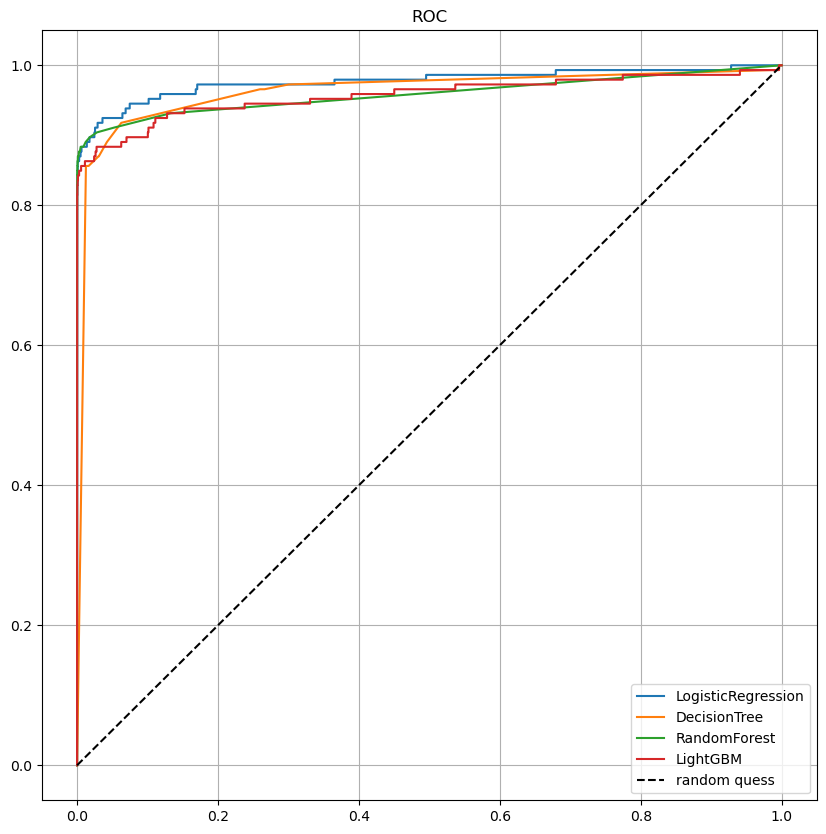

In [46]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, x_test, y_test) :
    plt.figure(figsize=(10, 10))

    for model in range(len(models)) :
        pred = models[model].predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, x_test, y_test)